<a href="https://colab.research.google.com/github/noeljaymon/BCI-Cursor-movement-using-EEG-signals/blob/master/BCI_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization

#from tensorflow.keras.regularizers import l2
import os
import random
import time
import keras
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import TensorBoard,LearningRateScheduler
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv1D
from keras.utils import np_utils
#from keras.regularizers import l2#, activity_l2
from keras.optimizers import SGD, RMSprop,Adam
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras import models
from keras.utils.vis_utils import plot_model  
from tensorflow.keras.layers import Input, Dense
from tensorflow.python.keras.layers.core import Reshape
#from keras.layers import Input, GlobalAveragePooling2D
#from keras.models import Model
#from tensorflow.keras import layers

Using TensorFlow backend.


250 samples of individual 16 channel fft graphs
used pi lsl to sample at a static rate of 25 iteration per sec 
each file is 10sec of him thinking in a direction.
#ye raw data hai apna
we have used 60 samples per channel from the raw input  
#iska reason sentdex k video mai hai dekh lo mai bhul gya (frequency related tha shayad)



In [ ]:
ACTIONS = ["left", "right", "none"]
reshape = (-1, 16, 60)   #16 channels of 60 samples per channel(-1 is default)
starting_dir="/content/drive/My Drive/bci dataset eeg/data"
training_data = {}
for action in ACTIONS:
   if action not in training_data:
       training_data[action] = []        #actions are the keys to the dict

   data_dir = os.path.join(starting_dir,action) #entering our action directory
   for item in os.listdir(data_dir):             #item corresponds to every image in our action folder
         
        data = np.load(os.path.join(data_dir, item))    
        for item in data:
           training_data[action].append(item)



In [ ]:
lengths = [len(training_data[action]) for action in ACTIONS]
print(lengths)

[95125, 94125, 95375]


In [ ]:
   for action in ACTIONS:
        np.random.shuffle(training_data[action])  # note that regular shuffle is GOOF af
        training_data[action] = training_data[action][:min(lengths)]

In [ ]:
lengths = [len(training_data[action]) for action in ACTIONS]
print(lengths)

[94125, 94125, 94125]


one hot encoding and converting into lists 
#labelling our data

In [ ]:
combined_data = []
for action in ACTIONS:
    for data in training_data[action]:

        if action == "left":
           combined_data.append([data, [1, 0, 0]])
        elif action == "right":
                #np.append(combined_data, np.array([data, [1, 0]]))
              combined_data.append([data, [0, 0, 1]])

        elif action == "none":
             combined_data.append([data, [0, 1, 0]])
np.random.shuffle(combined_data)
print("length:",len(combined_data))

length: 282375


#Creating traning data


In [ ]:
traindata = combined_data

In [ ]:
print("length:",len(traindata))

length: 282375


In [ ]:
train_X = []
train_y = []
for X, y in traindata:
    train_X.append(X)
    train_y.append(y)

In [ ]:
print(train_y[288])

[0 1 0]


In [ ]:
np.save('test_none_288',train_X[288])

#Example for loading the train and test set ...soo no neeed to perform above steps every time

In [ ]:
local_path ='/content/drive/My Drive/bci numpy files'
train_X = np.load(local_path + "/train_X.npy")
train_y = np.load(local_path + "/train_y.npy")
test_X = np.load(local_path + "/validation_X.npy")
test_y = np.load(local_path + "/validation_y.npy")

create testing data


60 values of 16 individual channels for one prediction
#ye ek training sample hai for one direction ...ye input jatha convolutional layer ko

In [ ]:
#for X,y in traindata:
 # print(X)
  #print(y)
  #break

[[0.0304209  0.05626681 0.15866952 0.25378618 0.27969709 0.54813576
  0.41920441 0.36464077 0.11890636 0.5491783  0.94308114 0.59832758
  0.49605116 0.62479407 0.7488544  1.10138905 0.88074666 0.46707246
  1.29285944 1.6660105  0.73065484 0.31413412 1.07635736 1.2214402
  1.00247061 0.74700272 0.44898584 0.44974327 0.85262841 0.43857664
  0.68885523 0.52755868 0.39992559 0.73874599 0.76314509 0.29282495
  0.27881628 0.54715747 0.64989543 0.24452148 0.16464998 0.57089776
  0.58338177 0.45693314 0.7557326  0.8279478  0.47257027 0.14158832
  0.18634336 0.20270965 0.31174353 0.5548774  0.34784776 0.35553852
  0.25171632 0.33400798 0.16249618 0.40704352 0.63770771 0.59690982]
 [0.02548917 0.05799161 0.15373355 0.18298268 0.31925955 0.53628832
  0.40540153 0.23399384 0.5211221  0.59640318 0.73871422 0.8307277
  0.40944108 0.56642723 0.35631514 0.63735372 0.81844169 0.37432739
  1.28946245 1.48819947 0.66612589 0.21632895 0.66140926 0.88006985
  0.77541405 0.42677224 0.35036972 0.35304224 0.5

#same procedure is followed for creating validation data 

In [ ]:
ACTIONS = ["left", "right", "none"]
reshape = (-1, 16, 60)
starting_dir="/content/drive/My Drive/bci dataset eeg/validation_data"
training_data = {}
for action in ACTIONS:
   if action not in training_data:
       training_data[action] = []

   data_dir = os.path.join(starting_dir,action)
   for item in os.listdir(data_dir):
         
        data = np.load(os.path.join(data_dir, item))
        for item in data:
           training_data[action].append(item)


In [ ]:
lengths = [len(training_data[action]) for action in ACTIONS]
print(lengths)

[11750, 11750, 11750]


In [ ]:
combined_data = []
for action in ACTIONS:
    for data in training_data[action]:

        if action == "left":
           combined_data.append([data, [1, 0, 0]])
        elif action == "right":
                #np.append(combined_data, np.array([data, [1, 0]]))
              combined_data.append([data, [0, 0, 1]])

        elif action == "none":
             combined_data.append([data, [0, 1, 0]])
np.random.shuffle(combined_data)
print("length:",len(combined_data))

length: 35250


In [ ]:
testdata = combined_data
test_X = []
test_y = []
for X, y in testdata:
    test_X.append(X)
    test_y.append(y)

print(len(train_X))
print(len(test_X))

282375
35250


In [ ]:

print(np.array(train_X).shape)
train_X = np.array(train_X).reshape(reshape)
test_X = np.array(test_X).reshape(reshape)

train_y = np.array(train_y)
test_y = np.array(test_y)


(282375, 16, 60)


In [ ]:
train_X.shape[1:]

(16, 60)

In [ ]:
train_X[0]

array([[0.0304209 , 0.05626681, 0.15866952, 0.25378618, 0.27969709,
        0.54813576, 0.41920441, 0.36464077, 0.11890636, 0.5491783 ,
        0.94308114, 0.59832758, 0.49605116, 0.62479407, 0.7488544 ,
        1.10138905, 0.88074666, 0.46707246, 1.29285944, 1.6660105 ,
        0.73065484, 0.31413412, 1.07635736, 1.2214402 , 1.00247061,
        0.74700272, 0.44898584, 0.44974327, 0.85262841, 0.43857664,
        0.68885523, 0.52755868, 0.39992559, 0.73874599, 0.76314509,
        0.29282495, 0.27881628, 0.54715747, 0.64989543, 0.24452148,
        0.16464998, 0.57089776, 0.58338177, 0.45693314, 0.7557326 ,
        0.8279478 , 0.47257027, 0.14158832, 0.18634336, 0.20270965,
        0.31174353, 0.5548774 , 0.34784776, 0.35553852, 0.25171632,
        0.33400798, 0.16249618, 0.40704352, 0.63770771, 0.59690982],
       [0.02548917, 0.05799161, 0.15373355, 0.18298268, 0.31925955,
        0.53628832, 0.40540153, 0.23399384, 0.5211221 , 0.59640318,
        0.73871422, 0.8307277 , 0.40944108, 0.5

In [ ]:
model = Sequential()

model.add(Conv1D(64, (5), padding='same', input_shape=train_X.shape[1:]))
model.add(Activation('relu'))

model.add(Conv1D(128, (5), padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(256, (5), padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(512, (5), padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(3, (16)))
model.add(Reshape((3,)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

TypeError: ignored

In [ ]:

from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras import regularizers
model = Sequential()

model.add(Conv1D(32, (3),padding='same', input_shape=train_X.shape[1:]))
model.add(Conv1D(32, (3),padding='same'))#model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Conv1D(64, (3),padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv1D(64, (3),padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization(axis=1))
model.add(Activation('relu'))

model.add(Dropout(0.25))
model.add(Conv1D(64, (5),padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2,padding='same'))
model.add(Dropout(0.25))


model.add(Conv1D(64, (5),padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization(axis=1))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2,padding='same'))
model.add(Dropout(0.25))

model.add(Conv1D(64, (5),padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2,padding='same'))
model.add(Dropout(0.25))

model.add(Conv1D(64, (5),padding='same', kernel_regularizer=regularizers.l2(0.01)))

model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2,padding='same'))

model.add(Dropout(0.25))

model.add(Reshape((3,)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

TypeError: ignored

In [ ]:
import math
epochs = 20
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 6
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [ ]:
lr_sc = LearningRateScheduler(decay, verbose=1)

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_160 (Conv1D)          (None, 16, 32)            5792      
_________________________________________________________________
conv1d_161 (Conv1D)          (None, 16, 32)            3104      
_________________________________________________________________
activation_137 (Activation)  (None, 16, 32)            0         
_________________________________________________________________
max_pooling1d_66 (MaxPooling (None, 8, 32)             0         
_________________________________________________________________
dropout_113 (Dropout)        (None, 8, 32)             0         
_________________________________________________________________
conv1d_162 (Conv1D)          (None, 8, 64)             6208      
_________________________________________________________________
batch_normalization_136 (Bat (None, 8, 64)           

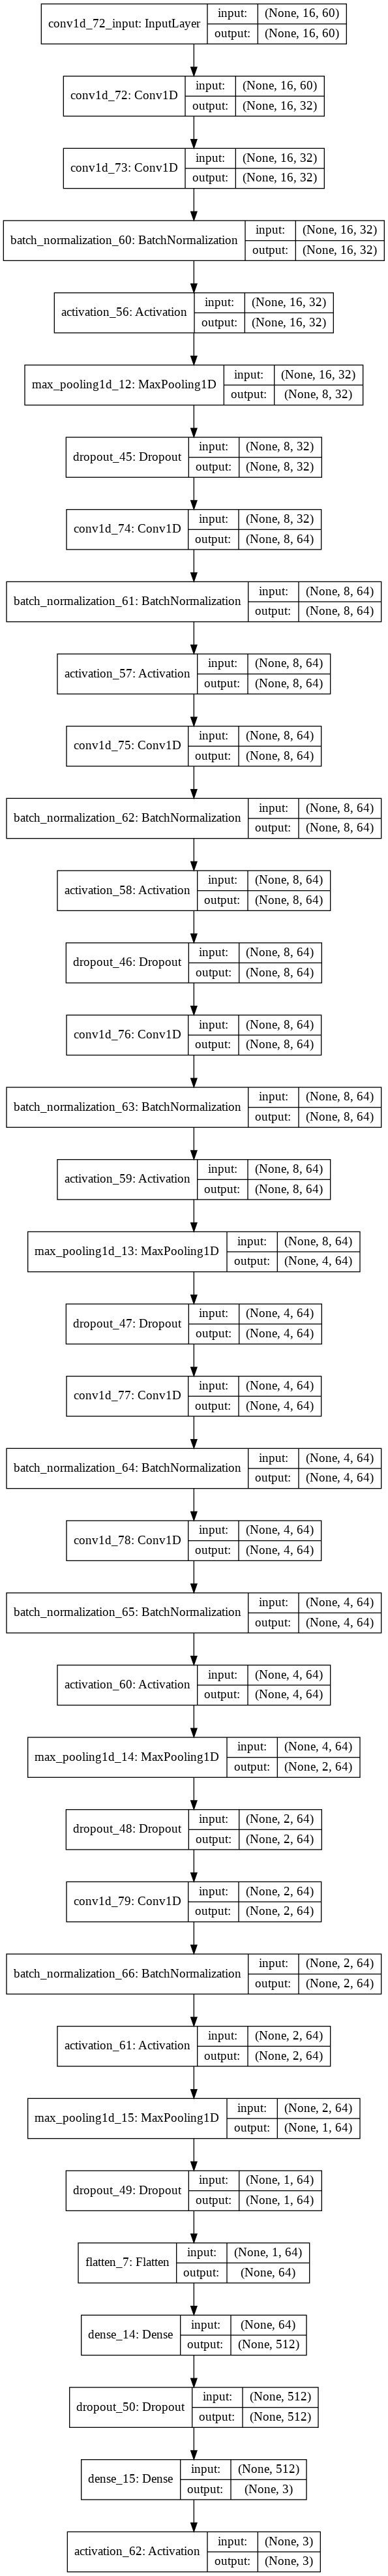

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 20
batch_size = 16
for epoch in range(epochs):
    history=model.fit(train_X, train_y, batch_size=batch_size,epochs=epochs, validation_data=(test_X, test_y))
    score = model.evaluate(test_X, test_y, batch_size=batch_size)
    print(score)
  

Train on 282375 samples, validate on 35250 samples
Epoch 1/20
282375/282375 [==============================] - 201s 714us/step - loss: 0.7857 - accuracy: 0.7218 - val_loss: 1.2464 - val_accuracy: 0.4079
Epoch 2/20
282375/282375 [==============================] - 206s 730us/step - loss: 0.7865 - accuracy: 0.7229 - val_loss: 1.3741 - val_accuracy: 0.4221
Epoch 3/20
282375/282375 [==============================] - 205s 726us/step - loss: 0.7850 - accuracy: 0.7235 - val_loss: 1.3765 - val_accuracy: 0.4231
Epoch 4/20
282375/282375 [==============================] - 202s 714us/step - loss: 0.7797 - accuracy: 0.7263 - val_loss: 1.3614 - val_accuracy: 0.4282
Epoch 5/20
282375/282375 [==============================] - 200s 708us/step - loss: 0.7780 - accuracy: 0.7277 - val_loss: 1.3617 - val_accuracy: 0.4271
Epoch 6/20
282375/282375 [==============================] - 201s 712us/step - loss: 0.7758 - accuracy: 0.7298 - val_loss: 1.3973 - val_accuracy: 0.4339
Epoch 7/20
282375/282375 [===========

KeyboardInterrupt: ignored

In [ ]:
model.save('bci_best.h5')


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Text(0.5, 1.0, 'Accuracy Curves')

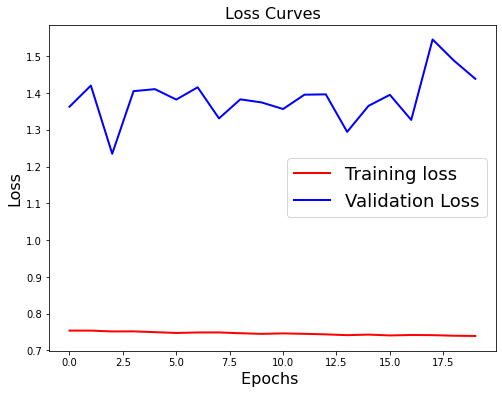

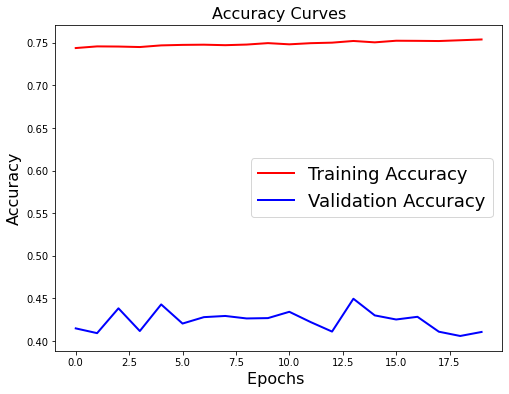

In [ ]:

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

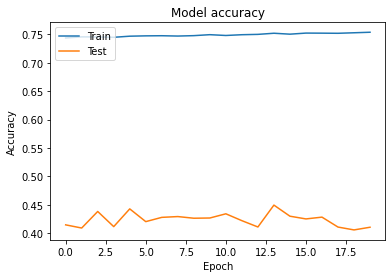

In [ ]:
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [ ]:
train_score = model.evaluate(train_X, train_y, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.6170920627838007
Train accuracy: 84.8251461982727
Test loss: 1.376337271778296
Test accuracy: 45.007091760635376


#analysis of the model
#code for confusion matrix

In [ ]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
MODEL_NAME = "/content/drive/My Drive/bci_best.h5"

In [ ]:
CLIP = False

In [ ]:
model = tf.keras.models.load_model(MODEL_NAME)

VALDIR = '/content/drive/My Drive/bci dataset eeg/validation_data'
ACTIONS = ['left','none','right']
PRED_BATCH = 32


In [ ]:
def get_val_data(valdir, action, batch_size):

    argmax_dict = {0: 0, 1: 0, 2: 0}
    raw_pred_dict = {0: 0, 1: 0, 2: 0}

    action_dir = os.path.join(valdir, action)
    for session_file in os.listdir(action_dir):
        filepath = os.path.join(action_dir,session_file)
        if CLIP:
            data = np.clip(np.load(filepath), -CLIP_VAL, CLIP_VAL) / CLIP_VAL
        else:
            data = np.load(filepath) 
        preds = model.predict([data.reshape(-1, 16, 60)], batch_size=batch_size)

        for pred in preds:
            argmax = np.argmax(pred)
            argmax_dict[argmax] += 1
            for idx,value in enumerate(pred):
                raw_pred_dict[idx] += value   
    argmax_pct_dict = {}

    for i in argmax_dict:
        total = 0
        correct = argmax_dict[i]
        for ii in argmax_dict:
            total += argmax_dict[ii]

        argmax_pct_dict[i] = round(correct/total, 3)

    return argmax_dict, raw_pred_dict, argmax_pct_dict          


__________
{'left': {0: 0.431, 1: 0.21, 2: 0.359}, 'none': {0: 0.318, 1: 0.473, 2: 0.209}, 'right': {0: 0.351, 1: 0.203, 2: 0.446}}
tf left
left 0
0.431
left 1
0.21
left 2
0.359
tf none
none 0
0.318
none 1
0.473
none 2
0.209
tf right
right 0
0.351
right 1
0.203
right 2
0.446


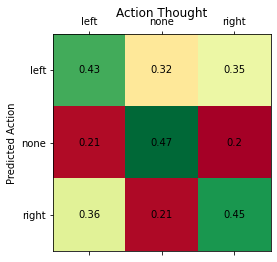

In [ ]:
def make_conf_mat(left, none, right):

    action_dict = {"left": left, "none": none, "right": right}
    action_conf_mat = pd.DataFrame(action_dict)
    actions = [i for i in action_dict]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(action_conf_mat, cmap=plt.cm.RdYlGn)
    ax.set_xticklabels([""]+actions)
    ax.set_yticklabels([""]+actions)

    print("__________")
    print(action_dict)
    for idx, i in enumerate(action_dict):
        print('tf',i)
        for idx2, ii in enumerate(action_dict[i]):
            print(i, ii)
            print(action_dict[i][ii])
            ax.text(idx, idx2, f"{round(float(action_dict[i][ii]),2)}", va='center', ha='center')
    plt.title("Action Thought")
    plt.ylabel("Predicted Action")
    plt.show()


left_argmax_dict, left_raw_pred_dict, left_argmax_pct_dict = get_val_data(VALDIR, "left", PRED_BATCH)
none_argmax_dict, none_raw_pred_dict, none_argmax_pct_dict = get_val_data(VALDIR, "none", PRED_BATCH)
right_argmax_dict, right_raw_pred_dict, right_argmax_pct_dict = get_val_data(VALDIR, "right", PRED_BATCH)

make_conf_mat(left_argmax_pct_dict, none_argmax_pct_dict, right_argmax_pct_dict)